### Testing my code vs Arias code to check for errors!

In [1]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 

parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import funcions_autonom as f
import atmosperic_correction as atm_c ## obs denne het før ac -> kan føre til feil dersom man ikke finner funkjsons navn
import base as ac

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = ".." ## filene hentes fra en mappe over der vi er nå

In [2]:
frohavet_path_0316 = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1a.nc")
frohavet_path_0316_b = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1b.nc")
frohavet_path_0316_c = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1c.nc")
frohavet_path_0316_d = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1d.nc")

satobj_h1 = Hypso1( path = frohavet_path_0316, verbose = True )

l1a_cube = satobj_h1.l1a_cube
l1b_cube = Hypso1( path = frohavet_path_0316_b, verbose = True )
l1c_cube = Hypso1( path = frohavet_path_0316_c, verbose = True )
l1d_cube = Hypso1( path = frohavet_path_0316_d, verbose = True )

l1c_cube = l1c_cube.l1c_cube
l1b_cube = l1b_cube.l1b_cube
l1d_cube = l1d_cube.l1d_cube

satobj_h1.run_direct_georeferencing()

[INFO] Loading L1a capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1b capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1c capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1d capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1837
[INFO] ADCS time range: 1678962780.000000 to 1678963680.000000
[INFO] Frame time range: 1678963448.503009 to 1678963491.912100
[INFO] 173 sample(s) inside frame time range
[INFO] Interpolating 956 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometr

In [3]:
frohavet_path_0328 = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1a.nc")
frohavet_path_0328_b = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1b.nc")
frohavet_path_0328_c = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1c.nc")
frohavet_path_0328_d = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1d.nc")

satobj_h1_0328 = Hypso1( path = frohavet_path_0328, verbose = True )

l1a_cube_0328 = satobj_h1_0328.l1a_cube
l1b_cube_0328 = Hypso1( path = frohavet_path_0328_b, verbose = True )
l1c_cube_0328 = Hypso1( path = frohavet_path_0328_c, verbose = True )
l1d_cube_0328 = Hypso1( path = frohavet_path_0328_d, verbose = True )

l1c_cube_0328 = l1c_cube_0328.l1c_cube
l1b_cube_0328 = l1b_cube_0328.l1b_cube
l1d_cube_0328 = l1d_cube_0328.l1d_cube

satobj_h1_0328.run_direct_georeferencing()

[INFO] Loading L1a capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1b capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1c capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1d capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1837
[INFO] ADCS time range: 1680000480.000000 to 1680001440.000000
[INFO] Frame time range: 1680001161.388534 to 1680001204.797625
[INFO] 174 sample(s) inside frame time range
[INFO] Interpolating 956 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometr

In [4]:
frohavet_path_0329 = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1a.nc")
frohavet_path_0329_b = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1b.nc")
frohavet_path_0329_c = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1c.nc")
frohavet_path_0329_d = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1d.nc")

satobj_h1_0329 = Hypso1( path = frohavet_path_0329, verbose = True )

l1a_cube_0329 = satobj_h1_0329.l1a_cube
l1b_cube_0329 = Hypso1( path = frohavet_path_0329_b, verbose = True )
l1c_cube_0329 = Hypso1( path = frohavet_path_0329_c, verbose = True )
l1d_cube_0329 = Hypso1( path = frohavet_path_0329_d, verbose = True )

l1c_cube_0329 = l1c_cube_0329.l1c_cube
l1b_cube_0329 = l1b_cube_0329.l1b_cube
l1d_cube_0329 = l1d_cube_0329.l1d_cube

satobj_h1_0329.run_direct_georeferencing()

[INFO] Loading L1a capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1b capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1c capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1d capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1678
[INFO] ADCS time range: 1680086040.000000 to 1680086915.000000
[INFO] Frame time range: 1680086691.474726 to 1680086734.883817
[INFO] 174 sample(s) inside frame time range
[INFO] Interpolating 956 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometr

In [2]:
fro_230330 = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1a.nc")
fro_230330_b = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1b.nc")
fro_230330_c = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1c.nc")
fro_230330_d = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1d.nc")

satobj_h1_230330 = Hypso1( path = fro_230330, verbose = True )

l1a_cube_230330 = satobj_h1_230330.l1a_cube
l1b_cube_230330 = Hypso1( path = fro_230330_b, verbose = True )
l1c_cube_230330 = Hypso1( path = fro_230330_c, verbose = True )
l1d_cube_230330 = Hypso1( path = fro_230330_d, verbose = True )

l1c_cube_230330 = l1c_cube_230330.l1c_cube
l1b_cube_230330 = l1b_cube_230330.l1b_cube
l1d_cube_230330 = l1d_cube_230330.l1d_cube

satobj_h1_230330.run_direct_georeferencing() # in order to get the longiyudes and latitudes

[INFO] Loading L1a capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1921
[INFO] ADCS time range: 1680171540.000000 to 1680172458.250000
[INFO] Frame time range: 1680172226.731407 to 1680172276.481407
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry comput

### Calibration 0330

In [6]:
latitudes_0330 = satobj_h1_230330.latitudes
longitudes_0330 = satobj_h1_230330.longitudes

calibration_lat = [63.642540, 63.642540, 63.642540, 63.642540] ##
calibration_long = [9.503311, 9.503311, 9.503311, 9.503311]

piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, latitudes_0330, longitudes_0330) #from file funcions_autonom.py

print(piksel_col_A3, piksel_col_A3)

[np.int64(360), np.int64(360), np.int64(360), np.int64(360)] [np.int64(360), np.int64(360), np.int64(360), np.int64(360)]


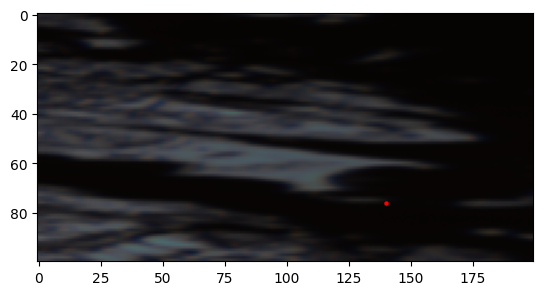

In [8]:
channel = 100
i_start, i_end = 150, 250
j_start, j_end = 300, 500

calibration_x = 80
calibration_y = 9
cropped = l1d_cube_230330[i_start:i_end, j_start:j_end, [50,70,90]]

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()


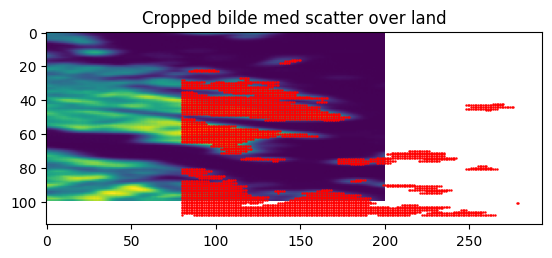

In [9]:
cropped = l1d_cube_230330[i_start:i_end, j_start:j_end, [50,70,90]]

plt.imshow(cropped, origin='upper')
plt.title("Cropped bilde med scatter over land")
#plt.colorbar()

# 4. Legg til scatter for land-punktene innenfor crop
for i in range(i_start, i_end):
    for j in range(j_start, j_end):
        lat = satobj_h1_230330.latitudes[i][j]
        lon = satobj_h1_230330.longitudes[i][j]
        if globe.is_land(lat, lon):
            # Juster j og i for croppet koordinatsystem
            plt.scatter(j - j_start + calibration_x, i - i_start + calibration_y, color='red', s=0.5)

plt.show()

### Calibration 0316

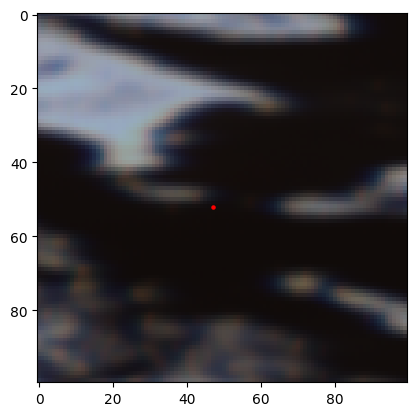

In [66]:
i_start, i_end = 550, 650
j_start, j_end = 300, 400

cropped = l1d_cube[i_start:i_end, j_start:j_end, [50,70,90]]

piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1.latitudes, satobj_h1.longitudes) #from file funcions_autonom.py

calibration_x = 88
calibration_y =14
cropped = l1d_cube[i_start:i_end, j_start:j_end, [50,70,90]]

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()

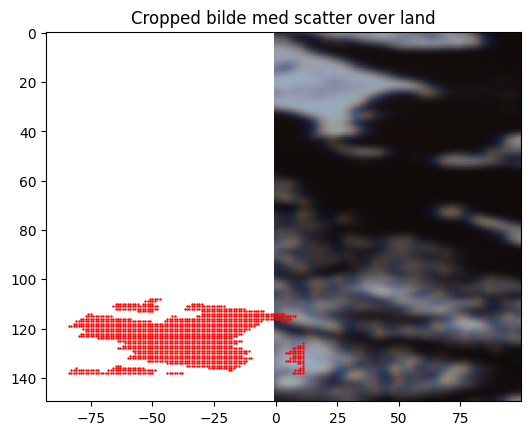

In [ ]:
i_start, i_end = 550, 700
j_start, j_end = 300, 400

cropped = l1d_cube[i_start:i_end, j_start:j_end, [50,70,90]]

plt.imshow(cropped, origin='upper')
plt.title("Cropped bilde med scatter over land")
#plt.colorbar()

# 4. Legg til scatter for land-punktene innenfor crop
for i in range(i_start, i_end):
    for j in range(j_start, j_end):
        lat = satobj_h1.latitudes[i][j]
        lon = satobj_h1.longitudes[i][j]
        if globe.is_land(lat, lon):
            # Juster j og i for croppet koordinatsystem
            plt.scatter(j - j_start + calibration_x, i - i_start + calibration_y, color='red', s=0.5)

plt.show()

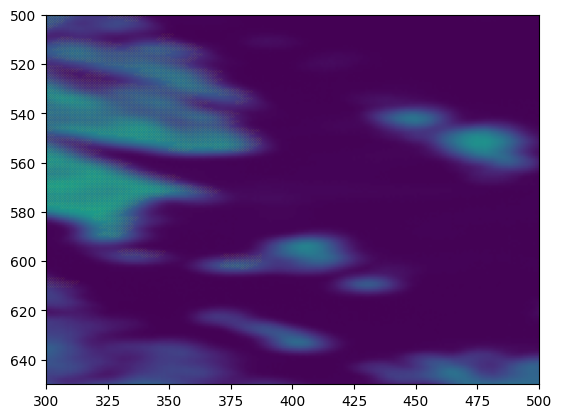

In [ ]:
plt.imshow(l1d_cube[:,:,100])
l1d_cube.shape
for i in range(i_start-100,i_end-100):
    for j in range(j_start-100,j_end-100):
        if globe.is_land(satobj_h1.latitudes[i][j], satobj_h1.longitudes[i][j]):
            #print("hello")
            plt.scatter(j + calibration_x, i + calibration_y , color='yellow', s=0.001)

plt.show()


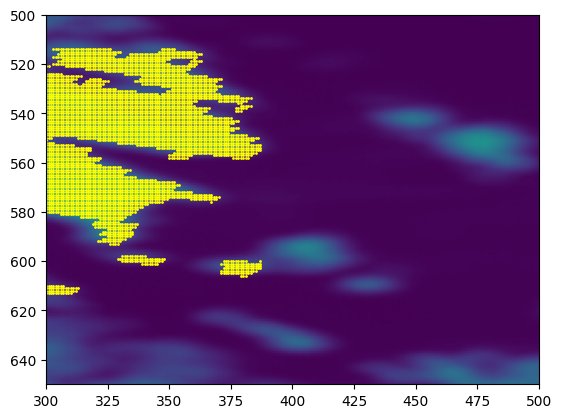

In [69]:
plt.imshow(l1d_cube[:, :, 100], origin='upper')  # Make sure image and scatter match

for i in range(i_start -50 , i_end -50 ):
    for j in range(j_start -100 , j_end- 100):
        if globe.is_land(satobj_h1.latitudes[i][j], satobj_h1.longitudes[i][j]):
            plt.scatter(j + calibration_x, i + calibration_y, color='yellow', s=1)

# Crop to region x = 300–500 and y = 500–650
plt.xlim(300, 500)
plt.ylim(650, 500)  # Y is inverted by default

plt.show()


### Calibration 0328

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.031024904921650887..1.1593345403671265].


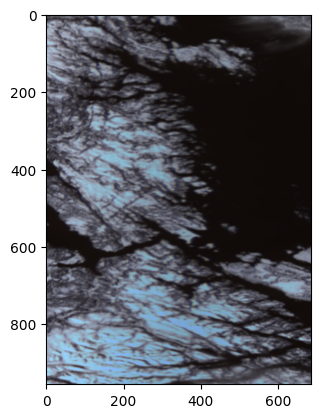

In [27]:
plt.imshow(l1d_cube_0328[:,:, [50,70,90]], origin='upper')

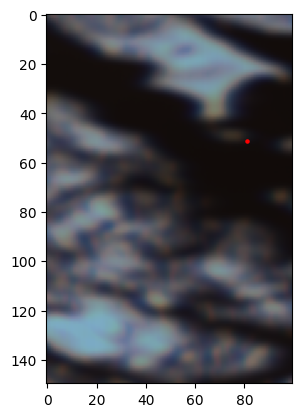

In [73]:
i_start, i_end = 550, 700
j_start, j_end = 300, 400

calibration_x = 79
calibration_y = 11
cropped = l1d_cube_0328[i_start:i_end, j_start:j_end, [50,70,90]]
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_0328.latitudes, satobj_h1_0328.longitudes) #from file funcions_autonom.py

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()

In [ ]:
i_start, i_end = 550, 700
j_start, j_end = 300, 400

cropped = l1d_cube_0328[i_start:i_end, j_start:j_end, [50,70,90]]

plt.imshow(cropped, origin='upper')
plt.title("Cropped bilde med scatter over land")
#plt.colorbar()

# 4. Legg til scatter for land-punktene innenfor crop
for i in range(i_start, i_end):
    for j in range(j_start, j_end):
        lat = satobj_h1_0328.latitudes[i][j]
        lon = satobj_h1_0328.longitudes[i][j]
        if globe.is_land(lat, lon):
            # Juster j og i for croppet koordinatsystem
            plt.scatter(j - j_start + calibration_x, i - i_start + calibration_y, color='red', s=0.5)

plt.show()

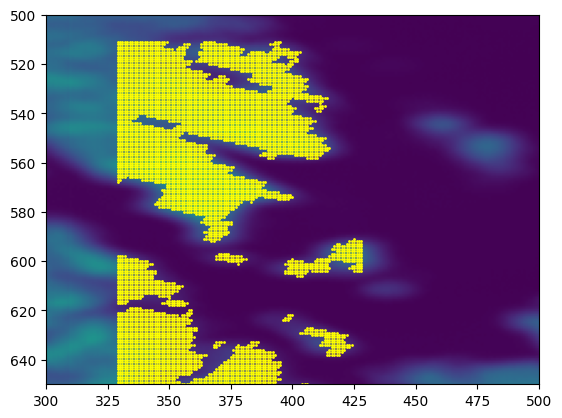

In [75]:
plt.imshow(l1d_cube_0328[:, :, 100], origin='upper')  # Make sure image and scatter match

for i in range(i_start -50 , i_end -50 ):
    for j in range(j_start -50 , j_end- 50):
        if globe.is_land(satobj_h1_0328.latitudes[i][j], satobj_h1_0328.longitudes[i][j]):
            plt.scatter(j + calibration_x, i + calibration_y, color='yellow', s=1)

# Crop to region x = 300–500 and y = 500–650
plt.xlim(300, 500)
plt.ylim(650, 500)  # Y is inverted by default

plt.show()

### Calibration area 29.03.23

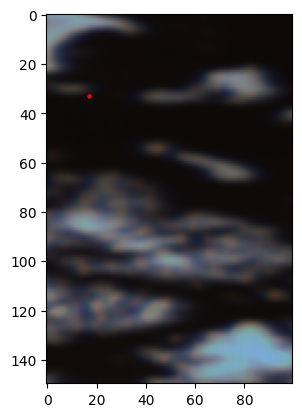

In [76]:
i_start, i_end = 550, 700
j_start, j_end = 300, 400

calibration_x = 79
calibration_y = 11
cropped = l1d_cube_0329[i_start:i_end, j_start:j_end, [50,70,90]]
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_0329.latitudes, satobj_h1_0329.longitudes) #from file funcions_autonom.py

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()

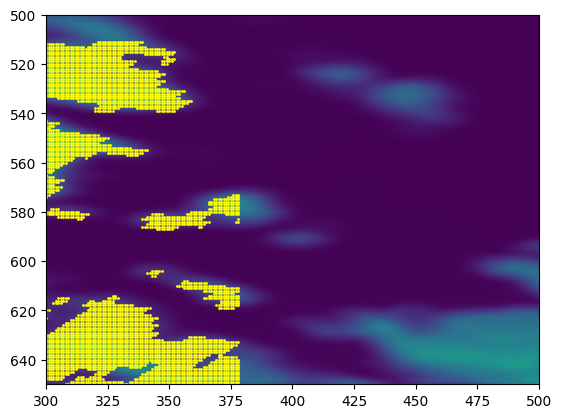

In [79]:
plt.imshow(l1d_cube_0329[:, :, 100], origin='upper')  # Make sure image and scatter match

for i in range(i_start -50 , i_end -50 ):
    for j in range(j_start -100 , j_end -100):
        if globe.is_land(satobj_h1_0329.latitudes[i][j], satobj_h1_0329.longitudes[i][j]):
            plt.scatter(j + calibration_x, i + calibration_y, color='yellow', s=1)

# Crop to region x = 300–500 and y = 500–650
plt.xlim(300, 500)
plt.ylim(650, 500)  # Y is inverted by default

plt.show()

### Selected areas

In [ ]:
#extract wanted waelengths
wl = satobj_h1_230330.wavelengths[4:118]
x_123 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
wl = x_123[4:118]

target_lat_6 = [64.48557437461893,64.52896641587218, 64.20992561747796, 64.22009411667561] 
target_lon_6 = [9.886201113342556, 8.708294855080245,9.704720121565003,8.73032214102829]  

target_lat_5 = [64.17324887890479,64.11631446557637, 63.896904083590066, 63.887923483169004] 
target_lon_5 = [9.582148298814932,8.924448409066027, 9.578289180688513, 8.96230357578283]

target_lat_3 = [63.818490304354434,63.793837321385155, 63.65192496143867, 63.660555970548074] 
target_lon_3 = [9.531415429238418, 9.442656298818237,9.526455044589706,9.439764451470932]

target_lat_2 = [63.623206,63.599280, 63.543536, 63.538151] 
target_lon_2 = [9.802551, 9.774811,9.903900,9.848145]  

target_lat_1 = [63.52676744792975, 63.535214, 63.44802428401152, 63.46332195091103] 
target_lon_1 = [10.726421572030368, 10.253265, 10.706024496195505, 10.211631333282082] 

#importlib.reload(ac)
importlib.reload(f)

<module 'funcions_autonom' from '/home/itk/Documents/AnneMarthe/Master/Hypos_analyse/funcions_autonom.py'>

### Atmospheric correction

In [80]:
cube_0316 = np.array(l1d_cube[:,:, 4:118]) # get the toa reflectance cube
sat = np.max(l1a_cube, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0316.reshape(-1,114), solar=np.ones(114), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0316 = (cube_0316 - S) /T
cube_norm_0316[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.1301401816368606
0.04033158572291059
0.0043536260012921185
0.002610166159932221
0.002069329725571627
0.0017488788983443101
0.0015675562437948837
0.0014519269304219705
0.0013700519783459366
0.0013086587127885204
0.0012609767983272498
0.0012230276420337283
0.001192251102317362
0.0011669748753443952
0.0011459015869627446
0.0011280356408282881
0.0011126720398337505
0.0010992849776469491
0.0010874772747466084
0.0010769473522588711


In [81]:
cube_0328 = np.array(l1d_cube_0328[:,:, 4:118]) # get the toa reflectance cube
sat = np.max(l1a_cube_0328, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0328.reshape(-1,114), solar=np.ones(114), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0328 = (cube_0328 - S) /T
cube_norm_0328[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.0072687712303497
0.0023336148293508266
0.0012809577941815683
0.0009450474458930948
0.0007919202743752482
0.0007168868302497517
0.0006784479805528784
0.000658309420355427
0.0006464645123131045
0.000639303298042594
0.0006346317471921651


In [82]:
cube_0329 = np.array(l1d_cube_0329[:,:, 4:118]) # get the toa reflectance cube
sat = np.max(l1a_cube_0329, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0329.reshape(-1,114), solar=np.ones(114), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0329 = (cube_0329 - S) /T
cube_norm_0329[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.0038781326811564987
0.0013346422662408501
0.0007336935341614267
0.0005544286898249861
0.000475959260024501
0.0004390181586600214
0.00042171704807263035
0.00041275304322712714
0.00040734874093377503
0.0004038078793395568


In [5]:
cube_0330 = np.array(l1d_cube_230330[:,:, 4:118]) # get the toa reflectance cube
sat = np.max(l1a_cube_230330, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0330.reshape(-1,114), solar=np.ones(114), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0330 = (cube_0330 - S) /T
cube_norm_0330[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.0035676612324148167
0.001245527125829396
0.0006724815614877414
0.0005202119703314721
0.00045535308963129975
0.0004240978869840134
0.00040827547054184295
0.0003999482628148956
0.00039519252738591325
0.00039218518750474787


### Calibration coefficents

In [6]:
cx_0316 = 88
cy_0316 = 14

cx_0328 = 79
cy_0328 = 11

cx_0329 = 79
cy_0329 = 11

cx_0330 = 80
cy_0330 = 9

### RRS for 0316

In [135]:
latitudes_0316 = satobj_h1.latitudes
longitudes_0316 = satobj_h1.longitudes

print(latitudes_0316[1][1])

piksel_row_A1_0316, piksel_col_A1_0316 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitudes_0316, longitudes_0316) #####________
print(piksel_row_A1_0316, piksel_col_A1_0316) 

for i in range(4):
    piksel_col_A1_0316[i] = piksel_col_A1_0316[i] + cx_0316
    piksel_row_A1_0316[i] = piksel_row_A1_0316[i] + cy_0316

rss_A1_0316 = f.hyps1_rss_matrix(cube_norm_0316, piksel_row_A1_0316, piksel_col_A1_0316, satobj_h1)    #####________
print(rss_A1_0316.shape) 

median_A1_0316_atmc = np.median(rss_A1_0316, axis = 0)
median_A1_0316_atmc.shape
normaized_spectrum_median_A1_0316 = f.min_max_nomralization(median_A1_0316_atmc)
l2_norm_A1_0316 = np.linalg.norm(median_A1_0316_atmc)  
l2_normalized_spectrum_A1_0316 = median_A1_0316_atmc / l2_norm_A1_0316  

65.08475654319237
[np.int64(317), np.int64(489), np.int64(324), np.int64(495)] [np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
Pixel number:  7
(7, 114)


In [136]:
piksel_row_A2_0316, piksel_col_A2_0316 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitudes_0316, longitudes_0316) #####________
print(piksel_row_A2_0316, piksel_col_A2_0316) 

for i in range(4):
    piksel_col_A2_0316[i] = piksel_col_A2_0316[i] + cx_0316
    piksel_row_A2_0316[i] = piksel_row_A2_0316[i] + cy_0316

rss_A2_0316 = f.hyps1_rss_matrix(cube_norm_0316, piksel_row_A2_0316, piksel_col_A2_0316, satobj_h1)    #####________
print(rss_A2_0316.shape) 

median_A2_0316_atmc = np.median(rss_A2_0316, axis = 0)
median_A2_0316_atmc.shape
normaized_spectrum_median_A1_0316 = f.min_max_nomralization(median_A2_0316_atmc)
l2_norm_A2_0316 = np.linalg.norm(median_A2_0316_atmc)  
l2_normalized_spectrum_A2_0316 = median_A2_0316_atmc / l2_norm_A2_0316  

[np.int64(568), np.int64(582), np.int64(548), np.int64(576)] [np.int64(115), np.int64(139), np.int64(0), np.int64(0)]
Pixel number:  318
(318, 114)


In [137]:
piksel_row_A3_0316, piksel_col_A3_0316 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0316, longitudes_0316) #####________
print(piksel_row_A3_0316, piksel_col_A3_0316) 

for i in range(4):
    piksel_col_A3_0316[i] = piksel_col_A3_0316[i] + cx_0316
    piksel_row_A3_0316[i] = piksel_row_A3_0316[i] + cy_0316

rss_A3_0316 = f.hyps1_rss_matrix(cube_norm_0316, piksel_row_A3_0316, piksel_col_A3_0316, satobj_h1)    #####________
print(rss_A3_0316.shape) 

median_A3_0316_atmc = np.median(rss_A3_0316, axis = 0)
median_A3_0316_atmc.shape
normaized_spectrum_median_A1_0316 = f.min_max_nomralization(median_A3_0316_atmc)
l2_norm_A3_0316 = np.linalg.norm(median_A3_0316_atmc)  
l2_normalized_spectrum_A3_0316 = median_A3_0316_atmc / l2_norm_A3_0316  

[np.int64(530), np.int64(544), np.int64(583), np.int64(586)] [np.int64(339), np.int64(369), np.int64(253), np.int64(300)]
Pixel number:  1537
(1537, 114)


In [138]:
piksel_row_A5_0316, piksel_col_A5_0316 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitudes_0316, longitudes_0316) #####________
print(piksel_row_A5_0316, piksel_col_A5_0316) 

#for i in range(4):
#    piksel_col_A5_0316[i] = piksel_col_A5_0316[i] + cx_0316
#    piksel_row_A5_0316[i] = piksel_row_A5_0316[i] + cy_0316

rss_A5_0316 = f.hyps1_rss_matrix(cube_norm_0316, piksel_row_A5_0316, piksel_col_A5_0316, satobj_h1)    #####________
print(rss_A5_0316.shape) 

median_A5_0316_atmc = np.median(rss_A5_0316, axis = 0)
median_A5_0316_atmc.shape
normaized_spectrum_median_A1_0316 = f.min_max_nomralization(median_A5_0316_atmc)
l2_norm_A5_0316 = np.linalg.norm(median_A5_0316_atmc)  
l2_normalized_spectrum_A5_0316 = median_A5_0316_atmc / l2_norm_A5_0316  

[np.int64(415), np.int64(547), np.int64(503), np.int64(542)] [np.int64(503), np.int64(683), np.int64(356), np.int64(668)]
Pixel number:  6597
(6597, 114)


In [139]:
piksel_row_A6_0316, piksel_col_A6_0316 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitudes_0316, longitudes_0316) #####________
print(piksel_row_A6_0316, piksel_col_A6_0316) 

#for i in range(4):
#    piksel_col_A6_0316[i] = piksel_col_A6_0316[i] + cx_0316
#    piksel_row_A6_0316[i] = piksel_row_A6_0316[i] + cy_0316

rss_A6_0316 = f.hyps1_rss_matrix(cube_norm_0316, piksel_row_A6_0316, piksel_col_A6_0316, satobj_h1)    #####________
print(rss_A6_0316.shape) 

median_A6_0316_atmc = np.median(rss_A6_0316, axis = 0)
median_A6_0316_atmc.shape
normaized_spectrum_median_A1_0316 = f.min_max_nomralization(median_A6_0316_atmc)
l2_norm_A6_0316 = np.linalg.norm(median_A6_0316_atmc)  
l2_normalized_spectrum_A6_0316 = median_A6_0316_atmc / l2_norm_A6_0316  

[np.int64(298), np.int64(622), np.int64(396), np.int64(617)] [np.int64(520), np.int64(683), np.int64(460), np.int64(683)]
Pixel number:  34996
(34996, 114)


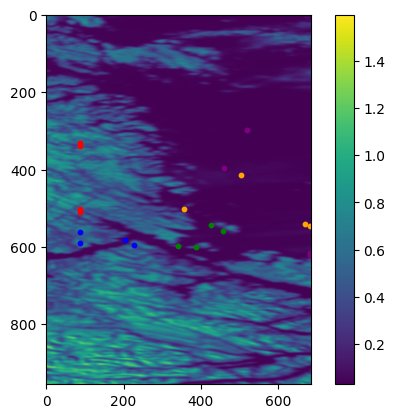

In [140]:
plt.imshow(cube_0316[:,:,100])
plt.colorbar()

for i in range(4):
    #plt.scatter(start_end_row_col_2[i], start_end_row_piksel_2[i] , color='red', s=10)
    plt.scatter(piksel_col_A1_0316[i], piksel_row_A1_0316[i] , color='red', s=10)
    plt.scatter(piksel_col_A2_0316[i], piksel_row_A2_0316[i] , color='blue', s=10)
    plt.scatter(piksel_col_A3_0316[i], piksel_row_A3_0316[i] , color='green', s=10)
    plt.scatter(piksel_col_A5_0316[i], piksel_row_A5_0316[i] , color='orange', s=10)
    plt.scatter(piksel_col_A6_0316[i], piksel_row_A6_0316[i] , color='purple', s=10)

### RRS for 0328

In [141]:
latitudes_0328 = satobj_h1_0328.latitudes
longitudes_0328 = satobj_h1_0328.longitudes

piksel_row_A1_0328, piksel_col_A1_0328 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitudes_0328, longitudes_0328) #####________
print(piksel_row_A1_0328, piksel_col_A1_0328) 

for i in range(4):
    piksel_col_A1_0328[i] = piksel_col_A1_0328[i] + cx_0328
    piksel_row_A1_0328[i] = piksel_row_A1_0328[i] + cy_0328

rss_A1_0328 = f.hyps1_rss_matrix(cube_norm_0328, piksel_row_A1_0328, piksel_col_A1_0328, satobj_h1_0328)    #####________
print(rss_A1_0328.shape) 

median_A1_0328_atmc = np.median(rss_A1_0328, axis = 0)
median_A1_0328_atmc.shape
normaized_spectrum_median_A1_0328 = f.min_max_nomralization(median_A1_0328_atmc)
l2_norm_A1_0328 = np.linalg.norm(median_A1_0328_atmc)  
l2_normalized_spectrum_A1_0328 = median_A1_0328_atmc / l2_norm_A1_0328  

[np.int64(437), np.int64(567), np.int64(444), np.int64(595)] [np.int64(0), np.int64(32), np.int64(0), np.int64(3)]
Pixel number:  0
(0,)


In [142]:
piksel_row_A2_0328, piksel_col_A2_0328 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitudes_0328, longitudes_0328) #####________
print(piksel_row_A2_0328, piksel_col_A2_0328) 

for i in range(4):
    piksel_col_A2_0328[i] = piksel_col_A2_0328[i] + cx_0328
    piksel_row_A2_0328[i] = piksel_row_A2_0328[i] + cy_0328

rss_A2_0328 = f.hyps1_rss_matrix(cube_norm_0328, piksel_row_A2_0328, piksel_col_A2_0328, satobj_h1_0328)    #####________
print(rss_A2_0328.shape) 

median_A2_0328_atmc = np.median(rss_A2_0328, axis = 0)
median_A2_0328_atmc.shape
normaized_spectrum_median_A2_0328 = f.min_max_nomralization(median_A2_0328_atmc)
l2_norm_A2_0328 = np.linalg.norm(median_A2_0328_atmc)  
l2_normalized_spectrum_A2_0328 = median_A2_0328_atmc / l2_norm_A2_0328  

[np.int64(568), np.int64(582), np.int64(602), np.int64(623)] [np.int64(204), np.int64(219), np.int64(54), np.int64(60)]
Pixel number:  516
(516, 114)


In [143]:
latitudes_0328 = satobj_h1_0328.latitudes
longitudes_0328 = satobj_h1_0328.longitudes

piksel_row_A3_0328, piksel_col_A3_0328 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0328, longitudes_0328) #####________
print(piksel_row_A3_0328, piksel_col_A3_0328) 

for i in range(4):
    piksel_col_A3_0328[i] = piksel_col_A3_0328[i] + cx_0328
    piksel_row_A3_0328[i] = piksel_row_A3_0328[i] + cy_0328

rss_A3_0328 = f.hyps1_rss_matrix(cube_norm_0328, piksel_row_A3_0328, piksel_col_A3_0328, satobj_h1_0328)    #####________
print(rss_A3_0328.shape) 

median_A3_0328_atmc = np.median(rss_A3_0328, axis = 0)
median_A3_0328_atmc.shape
normaized_spectrum_median_A3_0328 = f.min_max_nomralization(median_A3_0328_atmc)
l2_norm_A3_0328 = np.linalg.norm(median_A3_0328_atmc)  
l2_normalized_spectrum_A3_0328 = median_A3_0328_atmc / l2_norm_A3_0328  




[np.int64(534), np.int64(548), np.int64(586), np.int64(589)] [np.int64(364), np.int64(384), np.int64(297), np.int64(330)]
Pixel number:  1333
(1333, 114)


In [144]:
piksel_row_A5_0328, piksel_col_A5_0328 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitudes_0328, longitudes_0328) #####________
print(piksel_row_A5_0328, piksel_col_A5_0328) 

rss_A5_0328 = f.hyps1_rss_matrix(cube_norm_0328, piksel_row_A5_0328, piksel_col_A5_0328, satobj_h1_0328)    #####________
print(rss_A5_0328.shape) 

median_A5_0328_atmc = np.median(rss_A5_0328, axis = 0)
median_A5_0328_atmc.shape
normaized_spectrum_median_A5_0328 = f.min_max_nomralization(median_A5_0328_atmc)
l2_norm_A5_0328 = np.linalg.norm(median_A5_0328_atmc)  
l2_normalized_spectrum_A5_0328 = median_A5_0328_atmc / l2_norm_A5_0328  

[np.int64(421), np.int64(501), np.int64(507), np.int64(552)] [np.int64(500), np.int64(683), np.int64(381), np.int64(593)]
Pixel number:  658
(658, 114)


In [145]:
piksel_row_A6_0328, piksel_col_A6_0328 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitudes_0328, longitudes_0328) #####________
print(piksel_row_A6_0328, piksel_col_A6_0328) 

rss_A6_0328 = f.hyps1_rss_matrix(cube_norm_0328, piksel_row_A6_0328, piksel_col_A6_0328, satobj_h1_0328)    #####________
print(rss_A6_0328.shape) 

median_A6_0328_atmc = np.median(rss_A6_0328, axis = 0)
median_A6_0328_atmc.shape
normaized_spectrum_median_A6_0328 = f.min_max_nomralization(median_A6_0328_atmc)
l2_norm_A6_0328 = np.linalg.norm(median_A6_0328_atmc)  
l2_normalized_spectrum_A6_0328 = median_A6_0328_atmc / l2_norm_A6_0328  

[np.int64(305), np.int64(571), np.int64(401), np.int64(564)] [np.int64(532), np.int64(683), np.int64(474), np.int64(683)]
Pixel number:  24898
(24898, 114)


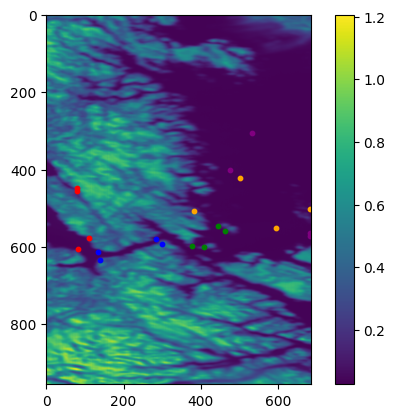

In [157]:
plt.imshow(cube_0328[:,:,100])
plt.colorbar()

for i in range(4):
    #plt.scatter(start_end_row_col_2[i], start_end_row_piksel_2[i] , color='red', s=10)
    plt.scatter(piksel_col_A1_0328[i], piksel_row_A1_0328[i] , color='red', s=10)
    plt.scatter(piksel_col_A2_0328[i], piksel_row_A2_0328[i] , color='blue', s=10)
    plt.scatter(piksel_col_A3_0328[i], piksel_row_A3_0328[i] , color='green', s=10)
    plt.scatter(piksel_col_A5_0328[i], piksel_row_A5_0328[i] , color='orange', s=10)
    plt.scatter(piksel_col_A6_0328[i], piksel_row_A6_0328[i] , color='purple', s=10)

### RRs for 0329

In [146]:
latitudes_0329 = satobj_h1_0329.latitudes
longitudes_0329 = satobj_h1_0329.longitudes

piksel_row_A1_0329, piksel_col_A1_0329 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitudes_0329, longitudes_0329) #####________
print(piksel_row_A1_0329, piksel_col_A1_0329) 

for i in range(4):
    piksel_col_A1_0329[i] = piksel_col_A1_0329[i] + cx_0329
    piksel_row_A1_0329[i] = piksel_row_A1_0329[i] + cy_0329

rss_A1_0329 = f.hyps1_rss_matrix(cube_norm_0329, piksel_row_A1_0329, piksel_col_A1_0329, satobj_h1_0329)    #####________
print(rss_A1_0329.shape) 

median_A1_0329_atmc = np.median(rss_A1_0329, axis = 0)
median_A1_0329_atmc.shape
normaized_spectrum_median_A1_0329 = f.min_max_nomralization(median_A1_0329_atmc)
l2_norm_A1_0329 = np.linalg.norm(median_A1_0329_atmc)  
l2_normalized_spectrum_A1_0329 = median_A1_0329_atmc / l2_norm_A1_0329  

[np.int64(292), np.int64(463), np.int64(299), np.int64(469)] [np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
Pixel number:  5
(5, 114)


In [147]:
piksel_row_A2_0329, piksel_col_A2_0329 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitudes_0329, longitudes_0329) #####________
print(piksel_row_A2_0329, piksel_col_A2_0329) 

for i in range(4):
    piksel_col_A2_0329[i] = piksel_col_A2_0329[i] + cx_0329
    piksel_row_A2_0329[i] = piksel_row_A2_0329[i] + cy_0329

rss_A2_0329 = f.hyps1_rss_matrix(cube_norm_0329, piksel_row_A2_0329, piksel_col_A2_0329, satobj_h1_0329)    #####________
print(rss_A2_0329.shape) 

median_A2_0329_atmc = np.median(rss_A2_0329, axis = 0)
median_A2_0329_atmc.shape
normaized_spectrum_median_A2_0329 = f.min_max_nomralization(median_A2_0329_atmc)
l2_norm_A2_0329 = np.linalg.norm(median_A2_0329_atmc)  
l2_normalized_spectrum_A2_0329 = median_A2_0329_atmc / l2_norm_A2_0329  

[np.int64(552), np.int64(567), np.int64(522), np.int64(550)] [np.int64(97), np.int64(119), np.int64(0), np.int64(0)]
Pixel number:  148
(148, 114)


In [148]:
latitudes_0329 = satobj_h1_0329.latitudes
longitudes_0329 = satobj_h1_0329.longitudes

piksel_row_A3_0329, piksel_col_A3_0329 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0329, longitudes_0329) #####________
print(piksel_row_A3_0329, piksel_col_A3_0329) 

for i in range(4):
    piksel_col_A3_0329[i] = piksel_col_A3_0329[i] + cx_0329
    piksel_row_A3_0329[i] = piksel_row_A3_0329[i] + cy_0329

rss_A3_0329 = f.hyps1_rss_matrix(cube_norm_0329, piksel_row_A3_0329, piksel_col_A3_0329, satobj_h1_0329)    #####________
print(rss_A3_0329.shape) 

median_A3_0329_atmc = np.median(rss_A3_0329, axis = 0)
median_A3_0329_atmc.shape
normaized_spectrum_median_A3_0329 = f.min_max_nomralization(median_A3_0329_atmc)
l2_norm_A3_0329 = np.linalg.norm(median_A3_0329_atmc)  
l2_normalized_spectrum_A3_0329 = median_A3_0329_atmc / l2_norm_A3_0329  

[np.int64(515), np.int64(528), np.int64(568), np.int64(570)] [np.int64(316), np.int64(346), np.int64(232), np.int64(279)]
Pixel number:  1484
(1484, 114)


In [149]:
piksel_row_A5_0329, piksel_col_A5_0329 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitudes_0329, longitudes_0329) #####________
print(piksel_row_A5_0329, piksel_col_A5_0329) 

rss_A5_0329 = f.hyps1_rss_matrix(cube_norm_0329, piksel_row_A5_0329, piksel_col_A5_0329, satobj_h1_0329)    #####________
print(rss_A5_0329.shape) 

median_A5_0329_atmc = np.median(rss_A5_0329, axis = 0)
median_A5_0329_atmc.shape
normaized_spectrum_median_A5_0329 = f.min_max_nomralization(median_A5_0329_atmc)
l2_norm_A5_0329 = np.linalg.norm(median_A5_0329_atmc)  
l2_normalized_spectrum_A5_0329 = median_A5_0329_atmc / l2_norm_A5_0329  

[np.int64(400), np.int64(515), np.int64(487), np.int64(527)] [np.int64(479), np.int64(683), np.int64(334), np.int64(640)]


Pixel number:  4661
(4661, 114)


In [150]:
piksel_row_A6_0329, piksel_col_A6_0329 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitudes_0329, longitudes_0329) #####________
print(piksel_row_A6_0329, piksel_col_A6_0329) 

rss_A6_0329 = f.hyps1_rss_matrix(cube_norm_0329, piksel_row_A1_0328, piksel_col_A6_0329, satobj_h1_0329)    #####________
print(rss_A6_0329.shape) 

median_A6_0329_atmc = np.median(rss_A6_0329, axis = 0)
median_A6_0329_atmc.shape
normaized_spectrum_median_A6_0329 = f.min_max_nomralization(median_A6_0329_atmc)
l2_norm_A6_0329 = np.linalg.norm(median_A6_0329_atmc)  
l2_normalized_spectrum_A6_0329 = median_A6_0329_atmc / l2_norm_A6_0329  

[np.int64(283), np.int64(593), np.int64(381), np.int64(585)] [np.int64(497), np.int64(683), np.int64(437), np.int64(683)]
Pixel number:  22543
(22543, 114)


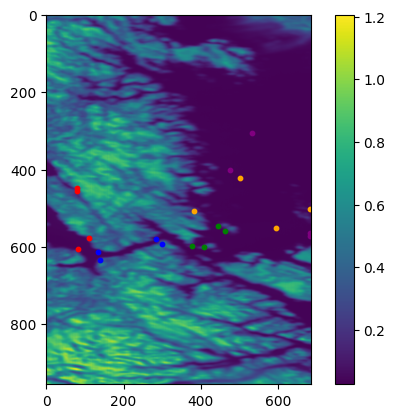

In [151]:
plt.imshow(cube_0328[:,:,100])
plt.colorbar()

for i in range(4):
    #plt.scatter(start_end_row_col_2[i], start_end_row_piksel_2[i] , color='red', s=10)
    plt.scatter(piksel_col_A1_0328[i], piksel_row_A1_0328[i] , color='red', s=10)
    plt.scatter(piksel_col_A2_0328[i], piksel_row_A2_0328[i] , color='blue', s=10)
    plt.scatter(piksel_col_A3_0328[i], piksel_row_A3_0328[i] , color='green', s=10)
    plt.scatter(piksel_col_A5_0328[i], piksel_row_A5_0328[i] , color='orange', s=10)
    plt.scatter(piksel_col_A6_0328[i], piksel_row_A6_0328[i] , color='purple', s=10)

### RRS for 230330

In [21]:
latitudes_0330 = satobj_h1_230330.latitudes
longitudes_0330 = satobj_h1_230330.longitudes

#latitudes_0330_indirect = satobj_h1_230330.latitudes_indirect
#longitudes_0330_indirect = satobj_h1_230330.longitudes_indirect

piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0330, longitudes_0330) #from file funcions_autonom.py
print(piksel_row_A3, piksel_col_A3) #sjekker at det er riktig

###nor calibrated
rss_A3_uncalibrated = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_A3, piksel_col_A3, satobj_h1_230330) 
#print(rss_A3.shape) #sjekker at det er riktig

median_A3_atmc_uncalibrated = np.median(rss_A3_uncalibrated, axis = 0)

#### calibrating
for i in range(4):
    piksel_col_A3[i] = piksel_col_A3[i] + cx_0330
    piksel_row_A3[i] = piksel_row_A3[i] + cy_0330

rss_A3 = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_A3, piksel_col_A3, satobj_h1_230330) 
print(rss_A3.shape) #sjekker at det er riktig

median_A3_atmc = np.median(rss_A3, axis = 0)
median_A3_atmc.shape
normaized_spectrum_median_A3 = f.min_max_nomralization(median_A3_atmc)
l2_norm_A3 = np.linalg.norm(median_A3_atmc)  #l2 norm
l2_normalized_spectrum_A3 = median_A3_atmc / l2_norm_A3  #l2 normalisering

[np.int64(185), np.int64(192), np.int64(215), np.int64(216)] [np.int64(447), np.int64(490), np.int64(350), np.int64(412)]
Pixel number:  519
Pixel number:  806
(806, 114)


In [22]:
piksel_row_A1, piksel_col_A1 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitudes_0330, longitudes_0330) #from file funcions_autonom.py
print(piksel_row_A1, piksel_col_A1) #sjekker at det er riktig

for i in range(4):
    piksel_col_A1[i] = piksel_col_A1[i] + cx_0330
    piksel_row_A1[i] = piksel_row_A1[i] + cy_0330

rss_A1 = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_A1, piksel_col_A1, satobj_h1_230330) 
print(rss_A1.shape) #sjekker at det er riktig

median_A1_atmc = np.median(rss_A1, axis = 0)
median_A1_atmc.shape
normaized_spectrum_median_A1 = f.min_max_nomralization(median_A1_atmc)
l2_norm_A1 = np.linalg.norm(median_A1_atmc)  #l2 norm
l2_normalized_spectrum_A1 = median_A1_atmc / l2_norm_A1  #l2 normalisering

[np.int64(224), np.int64(219), np.int64(240), np.int64(237)] [np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
Pixel number:  0
(0,)


In [23]:
piksel_row_A2, piksel_col_A2 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitudes_0330, longitudes_0330) #from file funcions_autonom.py
print(piksel_row_A2, piksel_col_A2) #sjekker at det er riktig

for i in range(4):
    piksel_col_A2[i] = piksel_col_A2[i] + cx_0330
    piksel_row_A2[i] = piksel_row_A2[i] + cy_0330

rss_A2 = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_A2, piksel_col_A2, satobj_h1_230330) 
print(rss_A2.shape) #sjekker at det er riktig

median_A2_atmc = np.median(rss_A2, axis = 0)
median_A2_atmc.shape
normaized_spectrum_median_A2 = f.min_max_nomralization(median_A2_atmc)
l2_norm_A2 = np.linalg.norm(median_A2_atmc)  #l2 norm
l2_normalized_spectrum_A2 = median_A2_atmc / l2_norm_A2  #l2 normalisering

[np.int64(212), np.int64(217), np.int64(223), np.int64(225)] [np.int64(151), np.int64(156), np.int64(40), np.int64(74)]
Pixel number:  0
(0,)


In [24]:
piksel_row_A5, piksel_col_A5 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitudes_0330, longitudes_0330) #from file funcions_autonom.py
print(piksel_row_A5, piksel_col_A5) #sjekker at det er riktig

for i in range(4):
    piksel_col_A5[i] = piksel_col_A5[i] + cx_0330
    piksel_row_A5[i] = piksel_row_A5[i] + cy_0330

rss_A5 = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_A5, piksel_col_A5, satobj_h1_230330) 
print(rss_A5.shape) #sjekker at det er riktig

median_A5_atmc = np.median(rss_A5, axis = 0)
median_A5_atmc.shape
normaized_spectrum_median_A5 = f.min_max_nomralization(median_A5_atmc)
l2_norm_A5 = np.linalg.norm(median_A5_atmc)  #l2 norm
l2_normalized_spectrum_A5 = median_A5_atmc / l2_norm_A5  #l2 normalisering

[np.int64(121), np.int64(150), np.int64(170), np.int64(189)] [np.int64(629), np.int64(1038), np.int64(463), np.int64(873)]


Pixel number:  5123
(5123, 114)


In [25]:
piksel_row_A6, piksel_col_A6 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitudes_0330, longitudes_0330) #from file funcions_autonom.py
print(piksel_row_A6, piksel_col_A6) #sjekker at det er riktig

#for i in range(4):
#    piksel_col_A6[i] = piksel_col_A6[i] + calibration_x
#    piksel_row_A6[i] = piksel_row_A6[i] + calibration_y

rss_A6 = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_A6, piksel_col_A6, satobj_h1_230330) 
print(rss_A6.shape) #sjekker at det er riktig

median_A6_atmc = np.median(rss_A6, axis = 0)
median_A6_atmc.shape
normaized_spectrum_median_A6 = f.min_max_nomralization(median_A6_atmc)
l2_norm_A6 = np.linalg.norm(median_A6_atmc)  #l2 norm
l2_normalized_spectrum_A6 = median_A6_atmc / l2_norm_A6  #l2 normalisering

[np.int64(57), np.int64(69), np.int64(111), np.int64(131)] [np.int64(622), np.int64(1091), np.int64(570), np.int64(1091)]
Pixel number:  20210
(20210, 114)


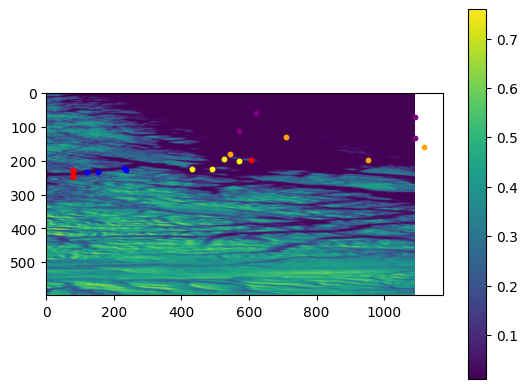

In [26]:
#plt.imshow(cube_0330[:,:,100])
plt.imshow(l1d_cube_230330[:,:,100])
plt.colorbar()

plt.scatter(607, 197 , color='red', s=10)

for i in range(4):
    #plt.scatter(start_end_row_col_2[i], start_end_row_piksel_2[i] , color='red', s=10)
    plt.scatter(piksel_col_A1[i], piksel_row_A1[i] , color='red', s=10)
    plt.scatter(piksel_col_A2[i], piksel_row_A2[i] , color='blue', s=10)
    plt.scatter(piksel_col_A3[i], piksel_row_A3[i] , color='yellow', s=10)
    #plt.scatter(piksel_row_A3[i], piksel_col_A3[i] , color='yellow', s=10)
    ##plt.scatter(piksel_col_A4[i], piksel_row_A4[i] , color='pink', s=10) #brukt for sjekk mot Arias kode 
    plt.scatter(piksel_col_A5[i], piksel_row_A5[i] , color='orange', s=10)
    plt.scatter(piksel_col_A6[i], piksel_row_A6[i] , color='purple', s=10)

### Sjekk av område som plottes

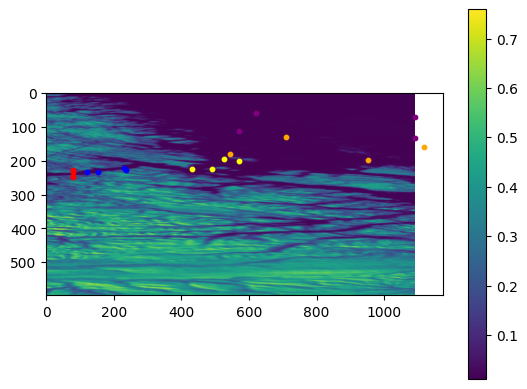

In [27]:
#plt.imshow(cube_0330[:,:,100])
plt.imshow(l1d_cube_230330[:,:,100])
plt.colorbar()

#plt.scatter(607, 197 , color='red', s=10)

for i in range(4):
    #plt.scatter(start_end_row_col_2[i], start_end_row_piksel_2[i] , color='red', s=10)
    plt.scatter(piksel_col_A1[i], piksel_row_A1[i] , color='red', s=10)
    plt.scatter(piksel_col_A2[i], piksel_row_A2[i] , color='blue', s=10)
    plt.scatter(piksel_col_A3[i], piksel_row_A3[i] , color='yellow', s=10)
    ##plt.scatter(piksel_col_A4[i], piksel_row_A4[i] , color='pink', s=10) #brukt for sjekk mot Arias kode 
    plt.scatter(piksel_col_A5[i], piksel_row_A5[i] , color='orange', s=10)
    plt.scatter(piksel_col_A6[i], piksel_row_A6[i] , color='purple', s=10)

### Plotting 

In [28]:
#
#plt.plot(wl, median_A1_atmc, color='purple', linestyle = '--', label='atmc calibrated A1 30.03.23')
#plt.plot(wl, median_A2_atmc, color='green', linestyle = '--', label='atmc calibrated A2 30.03.23')
#plt.plot(wl, median_A3_0316_atmc, color='purple', linestyle = '--')
#plt.plot(wl, median_A5_0316_atmc, color='black', linestyle = '--')
#plt.plot(wl, median_A6_0316_atmc, color='red', linestyle = '--')

plt.plot(wl, median_A3_0328_atmc, color='purple', linestyle = '--',  label='atmc calibrated A3 30 march')
#plt.plot(wl, median_A5_0328_atmc, color='black', linestyle = '--')
#plt.plot(wl, median_A6_0328_atmc, color='red', linestyle = '--')
#
plt.plot(wl, median_A3_0329_atmc, color='purple', linestyle = '--', label='atmc calibrated A3 29 march')
#plt.plot(wl, median_A5_0329_atmc, color='black', linestyle = '--')
#plt.plot(wl, median_A6_0329_atmc, color='red', linestyle = '--')
#
plt.plot(wl, median_A3_atmc, color='purple', linestyle = '--', label='atmc calibrated A3 30 march')
#plt.plot(wl, median_A5_atmc, color='black', linestyle = '--', label='atmc calibrated A5  march')
#plt.plot(wl, median_A6_atmc, color='red', linestyle = '--', label='atmc calibrated A6    march')


#plt.plot(wl, median_A3_0316_atmc, color='black', linestyle = '--', label='atmc calibrated A3 16.03.23')
#plt.plot(wl, median_A3_0328_atmc, color='red', linestyle = '--', label='atmc calibrated A3 28.03.23')
#plt.plot(wl, median_A3_0329_atmc, color='green', linestyle = '--', label='atmc calibrated A3 29.03.23')
#plt.plot(wl, median_A3_atmc, color='purple', linestyle = '--', label='atmc calibrated A3 30.03.23')



#plt.plot(wl, median_A3_atmc_uncalibrated, color='purple', label='atmc not calibrated')

############################## l2 normalized spectrums  ###################################

###################################### regarding the plots represenation ##############################
plt.xlabel("Wawelength (nm)")
plt.ylabel("Reflectance with atmospheric correction") #finne enheten her
plt.title("Median spectrum march")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

NameError: name 'median_A3_0328_atmc' is not defined